In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime
import calendar
# style.use('ggplot')

In [3]:
def Timestamp_mapping(n):
    historic = pd.read_csv("BTCUSD_2018_1min_Raw.csv",index_col=False)
    pd.to_datetime(historic.Date,errors='raise')
    temp = 86400 * n
    historic['UnixTime'] = historic.Date.apply(lambda x :int(calendar.timegm(datetime.datetime.strptime(x,"%d-%m-%y %H:%M").timetuple())) + temp)
    historic.to_csv('BTCUSD_2018_Output.csv',sep=',',encoding='utf-8')

In [4]:
def Mapping(news,twit):
    df_news = pd.read_csv(f"{news}.csv",index_col=False)
    df_twit = pd.read_csv(f"{twit}.csv",index_col=False)
    df_hist = pd.read_csv('BTCUSD_2018_Output.csv',index_col=False)
    cols=["UnixTime","UnixTime"]
    mapped = pd.DataFrame(df_news.merge(df_twit,on=cols,how='inner'))
    final = pd.DataFrame(mapped.merge(df_hist,on = cols,how='inner'))
    final.to_csv('Mapped_Final_Output.csv',sep=',',encoding = 'utf-8')

In [8]:
Timestamp_mapping(3)
Mapping("LP_12_Oct_to_14_Nov_18","mergefile")

In [10]:
df = pd.read_csv('Mapped_Final.csv',index_col=False,usecols=['News_Label','Twitt_Label','Volume','High','UnixTime'],)
df.head()

,UnixTime,News_Label,Twitt_Label,High,Volume
0,1540655760,0,0,6394.18,0.005533
1,1540655760,0,0,6394.18,0.005533
2,1540655760,0,0,6394.18,0.005533
3,1540655760,0,0,6394.18,0.005533
4,1540655760,0,0,6394.18,0.005533


In [11]:
df.describe()

,UnixTime,News_Label,Twitt_Label,High,Volume
count,3.241800e+04,32418.000000,32418.000000,32418.000000,32418.000000
mean,1.540785e+09,0.032667,0.073724,6350.714386,2.228470
std,8.383551e+05,0.214564,0.263910,66.495662,12.354142
min,1.539475e+09,-1.000000,-2.000000,6181.540000,0.000000
25%,1.540094e+09,0.000000,0.000000,6280.490000,0.002718
50%,1.540662e+09,0.000000,0.000000,6385.010000,0.082848
75%,1.541029e+09,0.000000,0.000000,6403.750000,1.076639
max,1.542153e+09,1.000000,1.000000,6676.170000,350.203804


In [12]:
df.drop_duplicates(inplace=True)
df.sort_values(by='UnixTime',inplace=True)
df.reset_index(drop=True,inplace=True)
print(df.describe())
df.head()

           UnixTime   News_Label  Twitt_Label         High       Volume
count  3.863000e+03  3863.000000  3863.000000  3863.000000  3863.000000
mean   1.540516e+09     0.042454     0.119337  6370.965182     2.354920
std    6.662657e+05     0.267832     0.332896    61.678111    13.255993
min    1.539475e+09    -1.000000    -2.000000  6181.540000     0.000000
25%    1.539983e+09     0.000000     0.000000  6314.880000     0.007764
50%    1.540483e+09     0.000000     0.000000  6393.310000     0.198185
75%    1.540835e+09     0.000000     0.000000  6407.285000     1.353645
max    1.542153e+09     1.000000     1.000000  6676.170000   350.203804


,UnixTime,News_Label,Twitt_Label,High,Volume
0,1539475200,0,0,6195.00,3.521828
1,1539475200,-1,0,6195.00,3.521828
2,1539475200,1,0,6195.00,3.521828
3,1539496800,0,0,6248.40,0.000000
4,1539529200,0,0,6230.19,0.000000


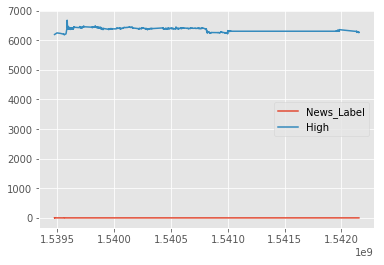

In [15]:
# df.High = df.High / np.mean(df.High)
plt.plot(df.UnixTime,df.News_Label)
plt.plot(df.UnixTime,df.High)
plt.legend()

### Output dataset columns

In [17]:
y = pd.read_csv('Mapped_Final_Output.csv',index_col=False,usecols=['News_Label','Twitt_Label','Volume','High','UnixTime'],)
y.head()

,UnixTime,News_Label,Twitt_Label,High,Volume
0,1540655760,0,0,6416.81,1.897012
1,1540655760,0,0,6416.81,1.897012
2,1540655760,0,0,6416.81,1.897012
3,1540655760,0,0,6416.81,1.897012
4,1540655760,0,0,6416.81,1.897012


In [18]:
y.describe()

,UnixTime,News_Label,Twitt_Label,High,Volume
count,3.241800e+04,32418.000000,32418.000000,32418.000000,32418.000000
mean,1.540785e+09,0.032667,0.073724,6376.898976,1.311370
std,8.383551e+05,0.214564,0.263910,69.818869,7.408240
min,1.539475e+09,-1.000000,-2.000000,6153.730000,0.000000
25%,1.540094e+09,0.000000,0.000000,6368.290000,0.000000
50%,1.540662e+09,0.000000,0.000000,6399.170000,0.033972
75%,1.541029e+09,0.000000,0.000000,6410.760000,0.589507
max,1.542153e+09,1.000000,1.000000,6676.550000,292.796012


In [19]:
y.drop_duplicates(inplace=True)
y.sort_values(by='UnixTime',inplace=True)
y.reset_index(drop=True,inplace=True)
print(y.describe())
y.head()

           UnixTime   News_Label  Twitt_Label         High       Volume
count  3.863000e+03  3863.000000  3863.000000  3863.000000  3863.000000
mean   1.540516e+09     0.042454     0.119337  6375.419912     1.892484
std    6.662657e+05     0.267832     0.332896    72.859767     9.709963
min    1.539475e+09    -1.000000    -2.000000  6153.730000     0.000000
25%    1.539983e+09     0.000000     0.000000  6383.460000     0.002410
50%    1.540483e+09     0.000000     0.000000  6398.740000     0.108709
75%    1.540835e+09     0.000000     0.000000  6411.160000     1.035650
max    1.542153e+09     1.000000     1.000000  6676.550000   292.796012


,UnixTime,News_Label,Twitt_Label,High,Volume
0,1539475200,0,0,6529.75,2.216576
1,1539475200,-1,0,6529.75,2.216576
2,1539475200,1,0,6529.75,2.216576
3,1539496800,0,0,6205.47,0.102874
4,1539529200,0,0,6214.97,2.123031


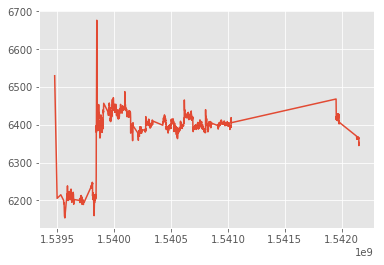

In [45]:
# df.High = df.High / np.mean(df.High)
# plt.plot(y.UnixTime,y.News_Label)
plt.plot(y.UnixTime,y.High)
plt.legend()

In [51]:
def draw_relation(y,relation,name): 
    fig, ax1 = plt.subplots()

    color = 'lightgreen'
    ax1.set_xlabel('Timestamp')
    ax1.set_ylabel(f'{name}',color = color)
    ax1.plot(y.UnixTime,relation,color = color)
    ax1.tick_params(axis='y',labelcolor=color)

    ax2 = ax1.twinx()
    color = 'navy'
    ax2.set_ylabel('Output',color = color)
    ax2.plot(y.UnixTime,y.High,color = color)
    ax2.tick_params(axis='y',labelcolor = color)

    fig.tight_layout()
    mng = plt.get_current_fig_manager()
    mng.full_screen_toggle()
    plt.show()

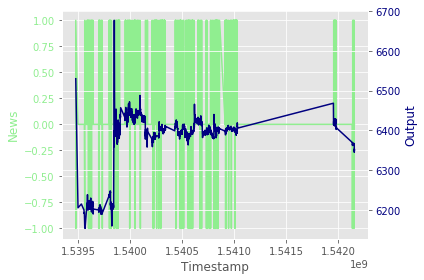

In [52]:
draw_relation(y,df.News_Label,'News')

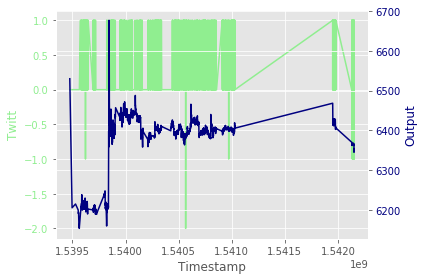

In [33]:
draw_relation(y,df.Twitt_Label,"Twitt")

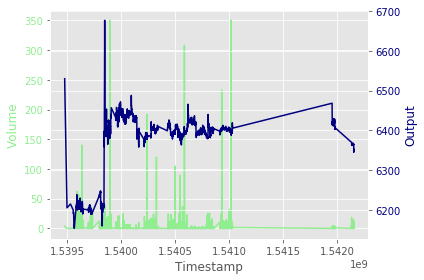

In [34]:
draw_relation(y,df.Volume,'Volume')